# Datahåndering II: Håndtere og visualisere data

```{admonition} Læringsutbytte
Etter å ha arbeidet med dette temaet, skal du kunne:
1. lese data fra fil
2. rydde og sortere data
3. visualisere fildata
```

```{epigraph}
In God we trust; all others must bring data.

-- Statistiker W. Edwards Deming (1900–1993)
```

Data er over alt. Til daglig prosesserer vi store mengder med data i hjernen vår, og vi lærer og konstruerer nye oppfatninger og sammenhenger basert på disse inntrykkene. Dersom vi snubler i en høy dørterskel tilstrekkelig mange ganger, lærer vi etter hvert å ta høyere skritt over akkurat denne terskelen. Vi klarer også stort sett å kjenne igjen dyr som hunder, katter og aper, og vi klarer å skille dem fra hverandre. Det er fordi vi har samlet masse data i løpet av livet som gjør oss egnet til å trekke slutninger og gjøre (som regel?) gode valg. Samfunnet og internett samler også data om oss, blant annet for å tilpasse seeropplevelser på Netflix eller annonser på Google. Heldigvis er datainnsamling ganske regulert gjennom lover og regler (GDPR = General Data Protection Regulation).

Vi kan også bruke data til å illustrere sammenhenger i natur og samfunn, og som utgangspunkt for modellering. Vi skal derfor her se på hvordan vi kan lese, bearbeide og visualisere data på en god måte.

## Datafiler
Vi ønsker ofte å oppbevare og overføre data i _råtekstformat_ fordi de er robuste og kan leses av alle. Det betyr at dataene ikke har noen formatering eller annen informasjon enn de faktiske dataene. En Word-fil er for eksempel ikke råtekst, fordi den inneholder formatering av tekst som farger, kursivering og tekststørrelse. Eksempler på råtekstfiler er .txt-filer og .csv-filer. Råtekstdata kan vi lage manuelt, eller vi kan få dem fra sensorer eller laste dem ned fra internett. De fleste store datafiler lagres i råtekst.

Vi kan bruke Python til å lese slike data på mange ulike måter. Vi skal se på tre ulike metoder å gjøre det på, slik at du kan benytte det som er best i en gitt situasjon. Alle metodene har fordeler og ulemper, som vi også skal adressere. Vi kommer derimot til å bruke metoden fra det mye brukte _Pandas_-biblioteket som standard seinere, så det kan være en fordel at du lærer deg denne metoden best. Det er også den enkleste måten å lese filer på.

Vi tar utgangspunkt i en liten fil med få datapunkter, slik at det er enkelt å se hva som skjer når vi leser fila. Fila beskriver temperaturen i en kaffekopp (i $^oC$) med tida (i minutter), og ser slik ut:

```{code-block} text
tid (min), temperatur (grader celsius)
0,90
1,80
2,72
3,64
4,59
5,51
6,45
7,42
8,39
9,37
10,36
```

Vi ser at fila skiller datapunktene med komma, og at første linje som fungerer som overskrift. Dette er viktig informasjon når vi skal lese fila. For å lese en datafil, må den enten ligge i samme mappe som programmet som leser fila, eller så må du spesifisere hvilken filbane fila har. Det enkleste er å legge den i samme mappe som programmet, eller i en mappe som for eksempel heter "datafiler", som ligger i samme mappe som programmet ditt. Alternativt går det an å lese rett fra en nettadresse som peker direkte på en datafil (f.eks. "https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h20/datafiler/temperatur.txt").

Nedenfor ser vi tre måter å lese filer på. Vi skal primært bruke Pandas-metoden videre, men vi skal likevel gjennomgå alle metodene slik at du kjenner til litt ulike framgangsmåter.

`````{tabbed} Standard Python
Vi kan bruke grunnstrukturer i Python til å lese filer uten å bruke biblioteker. Da må vi benytte løkker for å gjenta operasjoner for hver linje i fila:

<iframe src="https://trinket.io/embed/python3/764350732e" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

Her bruke vi kommandoen _open_, med nøkkelordet _"r"_ (read). I løkka leser programmet hver linje, og deler dataene ved hvert komma, spesifisert i kommandoen _split_. Dette genererer ei liste med to elementer, siden det er to elementer på hver rad. Disse elementene blir tolket som tekst. Derfor konverterer vi dem til flyttall og legger dem i hver sin liste, som vi plotter til slutt. Vi lukker også fila til slutt.
````{admonition} Underveisoppgave
:class: tip
Kjør programmet nedenfor i Trinket-vinduet ovenfor. Hva viser programmet deg?
```{code-block} Python
import matplotlib.pyplot as plt

fil = open("temperatur.txt", 'r')
fil.readline()                    
t = []						                
T = []					               

for rad in fil:				        
  print("rad:", rad)
  data = rad.split(",")		  
  print("splittet rad:", data)
  print("radelement 1:", data[0], "radelement 2:", data[1])
fil.close()
```
````
`````

`````{tabbed} Numpy-biblioteket
Det finnes også en nyttig funksjon som heter _loadtxt_ i _numpy_-biblioteket, som lar deg lese filer på en vektorisert måte uten løkker. Da lages det en array av dataene, med en array for hver kolonne inni denne arrayen. Arrayen er altså todimensjonal, og vi må derfor trekke ut de relevante kolonnene i hver sin endimensjonale array.

<iframe src="https://trinket.io/embed/python3/a9e44ccdb9" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

Her utfører vi "array-slicing", det vil si at vi plukker ut elementer fra en todimensjonal array og lager en ny endimensjonal array av det.

````{admonition} Underveisoppgave
:class: tip
Kjør programmet nedenfor i Trinket-vinduet ovenfor. Hva viser programmet deg om array-slicing? Eksperimenter gjerne med å bytte ut verdiene, slik at du forstår hvordan verdiene plukkes ut

```{code-block} Python
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("temperatur.txt", skiprows = 1, delimiter = ",") # Får to arrayer (kolonner) i en array
print(data)
t = data[0:3,0]
T = data[0:3,1] 
print(t)
print(T)

plt.scatter(t, T)
plt.xlabel("Tid (s)")
plt.xlabel("Temperatur ($^o$C)")
plt.show()
```
````
```````

`````{tabbed} Pandas-biblioteket
Et svært mye brukt bibliotek er Pandas-biblioteket. Det benyttes mye i datahåndtering og maskinlæring, og er kanskje den enkleste måten å lese filer på. Med funksjonen _read\_csv_ leses filer av typen .txt eller .csv, og vi får en ny datatype som kalles en _dataramme_ (_dataframe_). En slik datatype kan ses på som en slags dictionary, der kolonneoverskriftene fungerer som nøkler. Dermed skriver vi _data["temperatur"]_ for å få tilgang til kolonnen med overskriften "temperatur".

<iframe src="https://trinket.io/embed/python3/07e4100152" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

Pandas gir penest og ryddigst output dersom du bruker det i Jupyter Notebook. Vi skal bruke Pandas videre her, så da får du en smakebit på hva som er mulig.
`````

## Håndtere data med Pandas

Noen ganger trenger vi å rydde, utforske og omstrukturere datasettene våre før vi visualiserer dem. Dette egner Pandas seg svært godt til. La oss se på et eksempel. Datafila _penguins.txt_ inneholder ulik informasjon om pingviner som er registrert på ulike øyer. Vi kan lese fila slik:

In [1]:
import pandas as pd

pingvindata = pd.read_csv("https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h21/datafiler/penguings.txt", delimiter = ",")

Nå kan vi ta en kikk på de første eller siste linjene i datasettet vårt ved å bruke funksjonene _head_ eller _tail_. Dersom vi ikke gir disse funksjonene en parameterverdi, får vi de 5 første eller siste linjene:

In [2]:
pingvindata.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

Her ser vi både kolonnenavnene og verdier til de fem første pingvinene. Vi kan også se at vi får en litt merkelig verdi, nemlig NaN. Dette står for "Not a Number" og er en vanlig måte å markere at vi mangler data. Det betyr for eksempel at pingvinene er registrert, men at vi ikke fikk undersøkt den. Vi ser for øvrig at _read\_csv_ fra Pandas kan lese både NaN-verdier, tekst og tall samtidig.

## Rydde data

Mange ganger har vi behov for å utforske og rydde litt i datasettet vårt. Det kan hende vi kun trenger noen utvalgte verdier, eller det kan hende vi ønsker å slette noe. Programmet nedenfor viser deg noen muligheter. Husk at hvis du skal lagre verdier, må du tilordne dem til variabler. For eksempel _finner_ vi kun damepingvinene ved å skrive _pingvindata[pingvindata["sex"] == "FEMALE"]_. Hvis vi vil lage en dataframe som kun inneholder damepingvinene, må vi skrive _pingvindata_damer = pingvindata[pingvindata["sex"] == "FEMALE"]_. Nedenfor ser du et utvalg muligheter vi har med pandas. Studer eksempelen nøye og test dem gjerne ut selv! En god måte å jobbe med dette på, er å skrive ut _pingvindata.head()_ hver gang du har gjort en endring i datasettet for å se hva som har skjedd.

In [3]:
# Sjekke hvilke kolonnekategorier vi har
pingvindata.columns

# Teller ulike forekomster i kolonnen
pingvindata["sex"].value_counts()

# Finne en spesifikk kolonne
pingvindata["flipper_length_mm"]

# Finne et utvalg elementer [fra:til] av en spesifikk kolonne
pingvindata["flipper_length_mm"][0:10]

# Finne flere kolonner
pingvindata[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]

# Finne spesifikke elementer
pingvindata.loc[1]       # Element 1 (andre element)
pingvindata.loc[100][2]   # Element 100, kolonneverdi 2
pingvindata[pingvindata["sex"] == "FEMALE"] # Damepingviner

# Sortere verdier etter stigende (ascending = True) rekkefølge (først nebblengde, så nebbdybde)
pingvindata.sort_values(["bill_length_mm", "bill_depth_mm"], ascending = True)

# Velger ut kun de pingvinene med nebblengde under 40 mm
pingvindata_kort_nebb = pingvindata[pingvindata["bill_length_mm"] < 40]

# Sletter alle pingviner som har mangelfull info (NaN)
pingvindata.dropna()

# Legger til en ny kolonne
pingvindata["total_mm"] = pingvindata["bill_length_mm"] + pingvindata["bill_depth_mm"] 

# Lagre fila i en ny csv-fil
pingvindata.to_csv("ny_pingvinfil.csv", index = False)

# Sletter kolonnen har lagt til
pingvindata.pop("total_mm")
pingvindata.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

```{admonition} Underveisoppgave
:class: tip
Bruk pingvindatafila (du finner den under datafiler på nettsidene her) og les dataene med Pandas. Finn ut hvor mange hankjønnspingviner det er med kroppsmasse under 3000 g.
```

````{admonition} Løsningsforslag
:class: tip, dropdown
En mulig løsning er å gjøre det slik, eller kun sortere kroppsmasse og så bruke _count\_values_ til å telle antall av hvert kjønn.

```{code-block} Python
data1 = pingvindata[pingvindata["sex"] == "MALE"]
data1 = data1[data1["body_mass_g"] < 3500]
print("Antall hankjønnspinginver:", len(data1))
```
````

```{admonition} Underveisoppgave
:class: tip
Vi kan beskrive frekvens som antall forekomster av en verdi som tilhører en variabel. Relativ frekvens er antallet forekomster av noe delt på totalt antall verdier innenfor den samme variabelen. Regn ut relativ frekvens av antall pingviner av arten Adelie.
```

````{admonition} Løsningsforslag
:class: tip, dropdown
En mulig løsning er å gjøre det slik, eller kun sortere kroppsmasse og så bruke _count\_values_ til å telle antall av hvert kjønn.

```{code-block} Python
arter = pingvindata["species"].value_counts()
print(arter) # ser at Adelie er element 0 i lista over antall arter
adelie = arter[0]
n = len(pingvindata)
print("Relativ frekvens:", round(adelie/n,2))
```
````

## Visualisering
Visualisering av data er viktig. Det gir oss mulighet til å enkelt se sammenhenger og tolke data. En illustrasjon bør være så klar og enkel som mulig, uten unødvendige detaljer. Vær derfor kritisk når du skal lage dine egne figurer. Vi skal bruke et bibliotek som heter _seaborn_ til å lage fine visualiseringer. Seaborn-biblioteket inneholder noen ekstra fine plott som utvidelse til matplotlib, og vi kan bruke vanlige matplotlib-kommandoer som _xlabel_ og _title_ sammen med seaborn-kommandoene. La oss på noen få nyttige plott her. Vi skal se nærmere på andre plott ettersom de blir nyttige.

Her er et eksempel på et relasjonsplott ("relplot"), som viser sammenhengen mellom to variabler. Vi kan lage ulike markører og modifisere størrelsen til markørene. I plottet nedenfor er det kanskje litt i overkant mye informasjon som formidles, men det viser i hvert fall hva som er mulig.

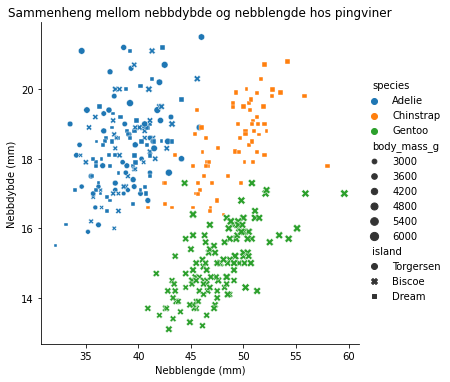

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.relplot(data=pingvindata, x="bill_length_mm",y="bill_depth_mm", hue="species", size="body_mass_g", style="island")
plt.xlabel("Nebblengde (mm)")
plt.ylabel("Nebbdybde (mm)")
plt.title("Sammenheng mellom nebbdybde og nebblengde hos pingviner")
plt.show()

```{admonition} Underveisoppgave
:class: tip
Forklar hva plottet ovenfor formidler. Foreslå eventuelt forbedringer av visualiseringen.
```

Visualiseringen nedenfor formidler noe av det samme, men med fokus på hvilke verdier som er mest vanlig hos de ulike artene. Vi kaller det for et "tetthetsplott" (kde = kernel density estimate), siden det viser fordelingen (tettheten) av de ulike verdiene. En slik visualisering kan leses omtrent som et kart med høydenivåer – den innerste "ringen" viser området der det er "høyest", altså har flesteparten av pingvinene denne fordelingen.

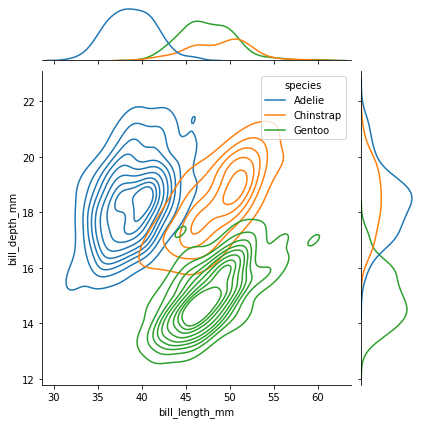

In [5]:
sns.jointplot(data=pingvindata, x="bill_length_mm",y="bill_depth_mm", hue="species", kind = "kde")

Plottet nedenfor er en variant av et tetthetsplott for én variabel:

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

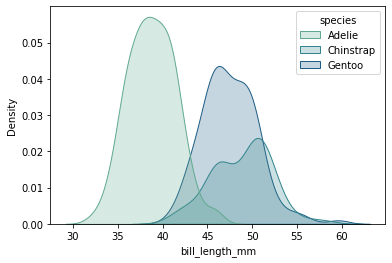

In [6]:
sns.kdeplot(data=pingvindata, x="bill_length_mm", hue="species", fill=True, palette="crest")

En annen nyttig visualisering er histogrammer. Det er figurer som viser fordeling av verdier ved å gruppere ulike verdier i intervaller . Du kan velge hvor mange søyler/intervaller som skal være med i histogrammet ved å justere parameteren _bins_. 

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

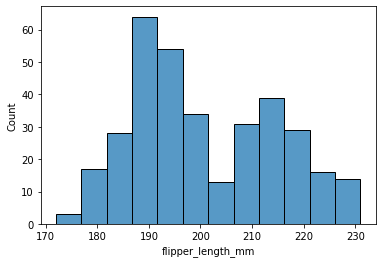

In [13]:
sns.histplot(data=pingvindata, x='flipper_length_mm', bins = 12)

Istedenfor antall søyler, kan vi for eksempel justere bredden på søylene:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

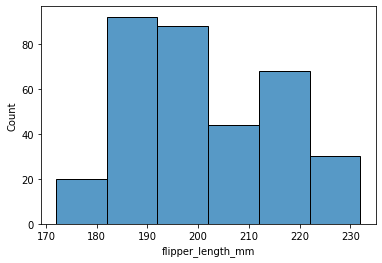

In [4]:
sns.histplot(data=pingvindata, x='flipper_length_mm', binwidth=10)

Dersom det er bedre å bruke søylediagram istedenfor histogram, kan vi bruke "barplot" istedenfor "histplot":

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

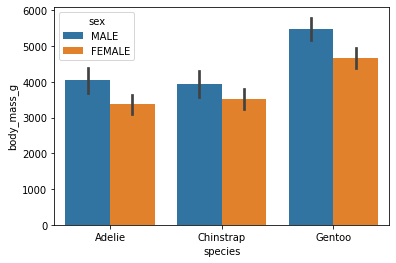

In [18]:
sns.barplot(data=pingvindata, x="species", y="body_mass_g", hue="sex", ci="sd") # ci = "sd" gir standardavviket som svarte streker

Søylediagrammer egner seg godt til å illustrere forskjeller mellom ulike kategorier, mens histogrammer viser fordelingen av en bestemt variabel. Vi ser også at søylediagrammene kan vise spredningen i datasettet (de svarte linjene).

Som sagt finnes det mange andre mulige visualiseringer og måter å pynte plottene på, men vi nøyer oss i første omgang  med disse.

I videoene nedenfor kan du få en innføring eller repetisjon i den grunnleggende teorien bak lesing av filer:

````{tabbed} Lese filer med loadtxt
<iframe width="800" height="600" src="https://www.youtube.com/embed/EqE0RU82gIU? autoplay=0&rel=0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
````
````{tabbed} Lese filer med pandas
<iframe width="800" height="600" src="https://www.youtube.com/embed/JACLHl37Iq4? autoplay=0&rel=0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
````